#questions to investigate

ALEX
- how male/female jobs compare with education levels (e.g. as F enter workforce, job is devalued)
- females now outnumber male college grads - will this devalue a degree?

JESS
- vet status....something?


- race...pay gap charted by state, maybe compare to F/M pay gap - is there a correlation?

VANESSA
- TBD after EDA


In [5]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

# from config import api_key '8d04447e785dbaddedf8b2863448385400974338'
# from config import absjson
absjson = r'./abs_data_2019.json'
edujson = r'./edu_data.json'


In [6]:
#before any import run this
%load_ext autoreload
%autoreload 2

In [7]:
HOST = 'https://api.census.gov/data'
year = '2019'
dataset = 'abscs'
geography = 'us'
# geography = 'state'
# geography = 'metropolitan statistical area/micropolitan statistical area'
params = {
    'get': 'NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL',
    'for': f'{geography}:*'
    # 'key': api_key
}
base_url = '/'.join([HOST,year,dataset])
response = requests.get(base_url,params=params)

base_url


'https://api.census.gov/data/2019/abscs'

In [8]:
HOST_edu = 'http://api.census.gov/data'
year_edu = '2019'
dataset_edu = 'timeseries/pseo/flows'
geography_edu = 'us'
# geography_edu = 'state'
# geography_edu = 'metropolitan statistical area/micropolitan statistical area'
#industry_edu = 
#grad_cohort_edu = 

params_edu = {
    'get': "NAME,Y1_GRADS_EMP,CIPCODE,INST_STATE,Y5_GRADS_EMP,INSTITUTION,Y10_GRADS_EMP,INDUSTRY,GRAD_COHORT", 
    'for': f'{geography_edu}:*'
    # 'key': api_key
}

base_url_edu = '/'.join([HOST_edu,dataset_edu])
response_edu = requests.get(base_url_edu, params=params_edu)

response_edu
base_url_edu


'http://api.census.gov/data/timeseries/pseo/flows'

In [9]:
# var = 'variables'
# varname = 'NAICS2017'
# NAICS_url = '/'.join([HOST,year,dataset,var,varname])

# NAICS_response = requests.get(NAICS_url)
# NAICS_data = NAICS_response.json()
# NAICS_df = pd.DataFrame(columns=['NAICS','Industry'])

# NAICS_data

# for item in NAICS_data['values']['item']:
#     code = item[0]
#     industry = item[1]
# NAICS_df = NAICS_df.append({'NAICS':code,'Industry':industry},ignore_index=True)
# NAICS_df

In [10]:
data = response.json()
with open(absjson, 'w') as f:
    json.dump(data, f)

In [11]:
data_edu = response_edu.json()
with open(edujson, 'w') as f_edu:
    json.dump(data_edu, f_edu)

In [13]:
census = pd.read_json(absjson)
census = pd.DataFrame(data[1:], columns=data[0])
# census

In [17]:
overall_total = census.groupby(['SEX_LABEL', 'RACE_GROUP_LABEL']).get_group(('Total','Total'))
overall_total

,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,us
1,United States,128898226,7227585564,001,Total,00,00,Total,001,Total,1
33,United States,3966417,191603469,001,Total,00,00,Total,002,Veteran,1
68,United States,1484443,64419414,001,Total,00,00,Total,003,Equally veteran/nonveteran,1
76,United States,58789150,2704618121,001,Total,00,00,Total,004,Nonveteran,1


In [18]:
overall_total = census.groupby(['SEX_LABEL', 'RACE_GROUP_LABEL']).get_group(('Total','Total'))
overall_total

,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,us
1,United States,128898226,7227585564,001,Total,00,00,Total,001,Total,1
33,United States,3966417,191603469,001,Total,00,00,Total,002,Veteran,1
68,United States,1484443,64419414,001,Total,00,00,Total,003,Equally veteran/nonveteran,1
76,United States,58789150,2704618121,001,Total,00,00,Total,004,Nonveteran,1


In [20]:
df_sex_race = census[['SEX_LABEL','RACE_GROUP_LABEL', 'PAYANN']].drop_duplicates(),
df_sex_race

(               SEX_LABEL                            RACE_GROUP_LABEL  \
 0    Equally male/female                                       Total   
 1                  Total                                       Total   
 2                 Female                                       Total   
 3                   Male                                       Total   
 4    Equally male/female                                       White   
 ..                   ...                                         ...   
 106                Total                                       Asian   
 107               Female                                       Asian   
 108                 Male                                       Asian   
 109  Equally male/female                                       Asian   
 110                Total  Native Hawaiian and Other Pacific Islander   
 
          PAYANN  
 0     293311176  
 1    7227585564  
 2     418552132  
 3    2248777697  
 4     263357005  
 ..     

In [28]:
# Filter rows
census_filter_rows3 = census.apply(lambda row: row[census['SEX_LABEL'].isin(['Male','Female'])])
census_filter_rows2 = census_filter_rows3.apply(lambda row: row[census_filter_rows3['RACE_GROUP_LABEL'] != 'Total'])
census_filter_rows = census_filter_rows2[census_filter_rows2['RACE_GROUP_LABEL'].str.endswith('ity')==False]
census_filter_rows


,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,us
7,United States,9132675,362776725,002,Female,30,30,White,001,Total,1
8,United States,41655173,2092354639,003,Male,30,30,White,001,Total,1
9,United States,151474,6228154,003,Male,50,50,American Indian and Alaska Native,001,Total,1
11,United States,56452,2246276,002,Female,50,50,American Indian and Alaska Native,001,Total,1
12,United States,448390,12995635,002,Female,40,40,Black or African American,001,Total,1
13,United States,702981,24753526,003,Male,40,40,Black or African American,001,Total,1
16,United States,1228187,43524906,002,Female,60,60,Asian,001,Total,1
17,United States,3081354,123414253,003,Male,60,60,Asian,001,Total,1
21,United States,13877,464393,002,Female,70,70,Native Hawaiian and Other Pacific Islander,001,Total,1
22,United States,34355,1399251,003,Male,70,70,Native Hawaiian and Other Pacific Islander,001,Total,1


In [110]:
census_filter_rows.PAYANN = census.PAYANN.astype(int)
census_filter_rows.EMP = census.EMP.astype(int)

C:\Users\alexa\AppData\Local\Temp\ipykernel_11668\2006215952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_filter_rows.PAYANN = census.PAYANN.astype(int)
C:\Users\alexa\AppData\Local\Temp\ipykernel_11668\2006215952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_filter_rows.EMP = census.EMP.astype(int)


In [121]:
census_filter_rows['avePay'] = pd.DataFrame(census_filter_rows['PAYANN']).div(pd.DataFrame(census_filter_rows['EMP']))


ValueError: Columns must be same length as key

In [125]:
census_filter_rows = pd.DataFrame(census_filter_rows)
census_filter_rows["AVEPAY"] = census_filter_rows["PAYANN"]/census_filter_rows["EMP"]
census_filter_rows

,NAME,EMP,PAYANN,SEX,SEX_LABEL,RACE_GROUP,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,us,avePay,AVEPAY
7,United States,9132675,362776725,002,Female,30,30,White,001,Total,1,40,40
8,United States,41655173,2092354639,003,Male,30,30,White,001,Total,1,50,50
9,United States,151474,6228154,003,Male,50,50,American Indian and Alaska Native,001,Total,1,41,41
11,United States,56452,2246276,002,Female,50,50,American Indian and Alaska Native,001,Total,1,40,40
12,United States,448390,12995635,002,Female,40,40,Black or African American,001,Total,1,29,29
13,United States,702981,24753526,003,Male,40,40,Black or African American,001,Total,1,35,35
16,United States,1228187,43524906,002,Female,60,60,Asian,001,Total,1,35,35
17,United States,3081354,123414253,003,Male,60,60,Asian,001,Total,1,40,40
21,United States,13877,464393,002,Female,70,70,Native Hawaiian and Other Pacific Islander,001,Total,1,33,33
22,United States,34355,1399251,003,Male,70,70,Native Hawaiian and Other Pacific Islander,001,Total,1,41,41


In [126]:
#filter columns
census_filtered = census_filter_rows[['AVEPAY', 'SEX_LABEL', 'RACE_GROUP_LABEL']]
census_filtered

,AVEPAY,SEX_LABEL,RACE_GROUP_LABEL
7,40,Female,White
8,50,Male,White
9,41,Male,American Indian and Alaska Native
11,40,Female,American Indian and Alaska Native
12,29,Female,Black or African American
13,35,Male,Black or African American
16,35,Female,Asian
17,40,Male,Asian
21,33,Female,Native Hawaiian and Other Pacific Islander
22,41,Male,Native Hawaiian and Other Pacific Islander


In [49]:
#to format large numbers
pd.options.display.float_format = '{:.0f}'.format


In [127]:
#aggregated table
census_filtered = (
    census_filtered
    .groupby(['SEX_LABEL', 'RACE_GROUP_LABEL'])
    .agg('mean')
    .reset_index()
)
census_filtered

,SEX_LABEL,RACE_GROUP_LABEL,AVEPAY
0,Female,American Indian and Alaska Native,40
1,Female,Asian,35
2,Female,Black or African American,32
3,Female,Native Hawaiian and Other Pacific Islander,33
4,Female,White,39
5,Male,American Indian and Alaska Native,38
6,Male,Asian,47
7,Male,Black or African American,36
8,Male,Native Hawaiian and Other Pacific Islander,41
9,Male,White,50


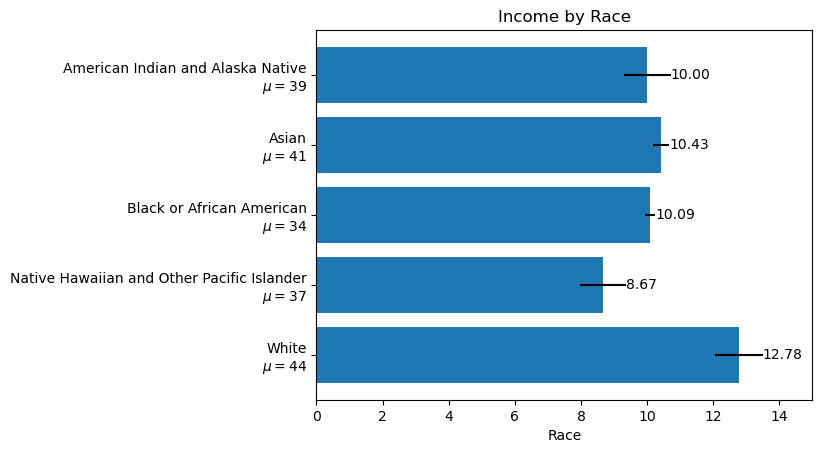

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


race = (
    "American Indian and Alaska Native\n $\\mu=39$",
    "Asian\n $\\mu=41$",
    "Black or African American\n $\\mu=34$",
    "Native Hawaiian and Other Pacific Islander\n $\\mu=37$",
    "White\n $\\mu=44$",
)
gender = {
    "Male": np.array([38,47,36,41,50]),
    "Female": np.array([40,35,32,33,39]),
}
# Example data
y_pos = np.arange(len(race))
performance = 3 + 10 * np.random.rand(len(race))
error = np.random.rand(len(race))

fig, ax = plt.subplots()

hbars = ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=race)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Race')
ax.set_title('Income by Race')


# Label with specially formatted floats
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()


TypeError: __init__() got an unexpected keyword argument 'ncols'

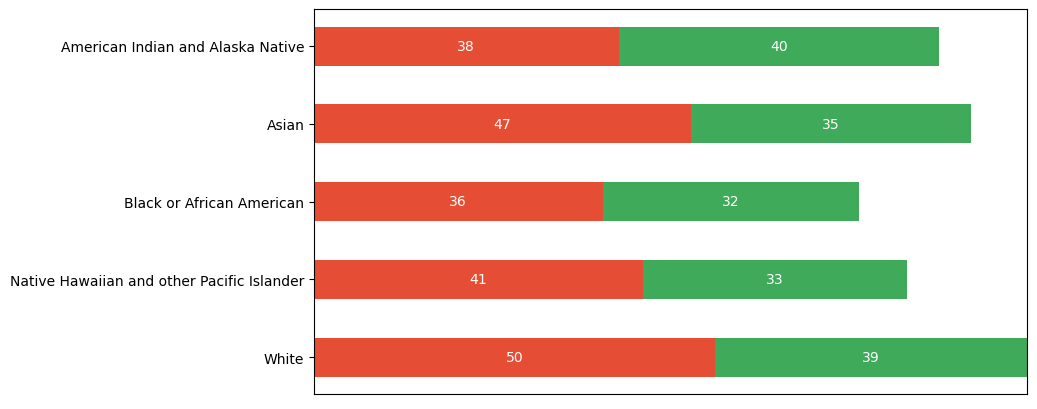

In [195]:
import numpy as np
import matplotlib.pyplot as plt


gender = ['Male','Female']
results = {
    'American Indian and Alaska Native': [38,40],
    'Asian': [47,35],
    'Black or African American': [36,32],
    'Native Hawaiian and other Pacific Islander': [41,33],
    'White': [50,39]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

In [196]:
edu_df = pd.read_json(edujson)
edu_df = pd.DataFrame(data_edu[1:], columns=data_edu[0])
edu_df

,NAME,Y1_GRADS_EMP,CIPCODE,INST_STATE,Y5_GRADS_EMP,INSTITUTION,Y10_GRADS_EMP,INDUSTRY,GRAD_COHORT,us
0,United States,49897,00,01,45844,00105100,20282,00,0000,1
1,United States,12865,00,01,9386,00105200,None,00,0000,1
2,United States,8795,00,01,7043,00105500,2065,00,0000,1
3,United States,118198,00,04,90448,00108100,29863,00,0000,1
4,United States,44518,00,04,33951,00108200,13277,00,0000,1
...,...,...,...,...,...,...,...,...,...,...
843040,United States,209,52,18,None,30182251,None,62,2016,1
843041,United States,9,52,18,None,30182251,None,71,2016,1
843042,United States,25,52,18,None,30182251,None,72,2016,1
843043,United States,19,52,18,None,30182251,None,81,2016,1


TypeError: Horizontal orientation requires numeric `x` variable.

In [128]:
sex_label_categories = (
    census_filtered
    .groupby(['SEX_LABEL'])
    .agg('mean')
    .reset_index()
)
sex_label_categories


,SEX_LABEL,AVEPAY
0,Female,36
1,Male,42


In [129]:
race_categories = (
    census_filtered
    .groupby(['RACE_GROUP_LABEL'])
    .agg('mean')
    .reset_index()
)
race_categories



,RACE_GROUP_LABEL,AVEPAY
0,American Indian and Alaska Native,39
1,Asian,41
2,Black or African American,34
3,Native Hawaiian and Other Pacific Islander,37
4,White,44
